
Reads in the file task_timings.log and calculates the total time taken to run 
the tasks. Visualizes the data in a bar chart.


/Users/bea/anaconda3/envs/hsol_py310/lib/python3.10/site-packages/seaborn/_statistics.py:31: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.stats import gaussian_kde


/Users/bea/Documents/GitHub/SAPPHIRE_forecast_tools/apps/pipeline/src
/Users/bea/Documents/GitHub/sensitive_data_forecast_tools/intermediate_data/task_timings_KG_20250424.log
Task Timing Summary:
                                  Task  Duration   Status
0                DeleteOldGatewayFiles      0.12  Success
1                  PreprocessingRunoff    143.58  Success
2  PreprocessingGatewayQuantileMapping   5477.62   Failed
3                     LinearRegression     20.26  Success
4              PostProcessingForecasts     65.33  Success

Task Statistics:
                                   Task  Min (s)  Max (s)     Mean (s)  \
0                       ConceptualModel  1564.80  5563.92  2110.157714   
5   PreprocessingGatewayQuantileMapping     0.00  7499.23   953.680921   
9                  RunMLModel_TFT_DECAD   169.11   919.55   213.314923   
4               PostProcessingForecasts    59.56   360.79   212.211077   
14            RunMLModel_TSMIXER_PENTAD   108.44  3109.35   185.8296

/var/folders/fx/fhbs7qgd6998fvtd5n8bs1lr0000gn/T/ipykernel_82003/670524984.py:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Duration', y='Task', data=df, ci=None, palette='viridis')


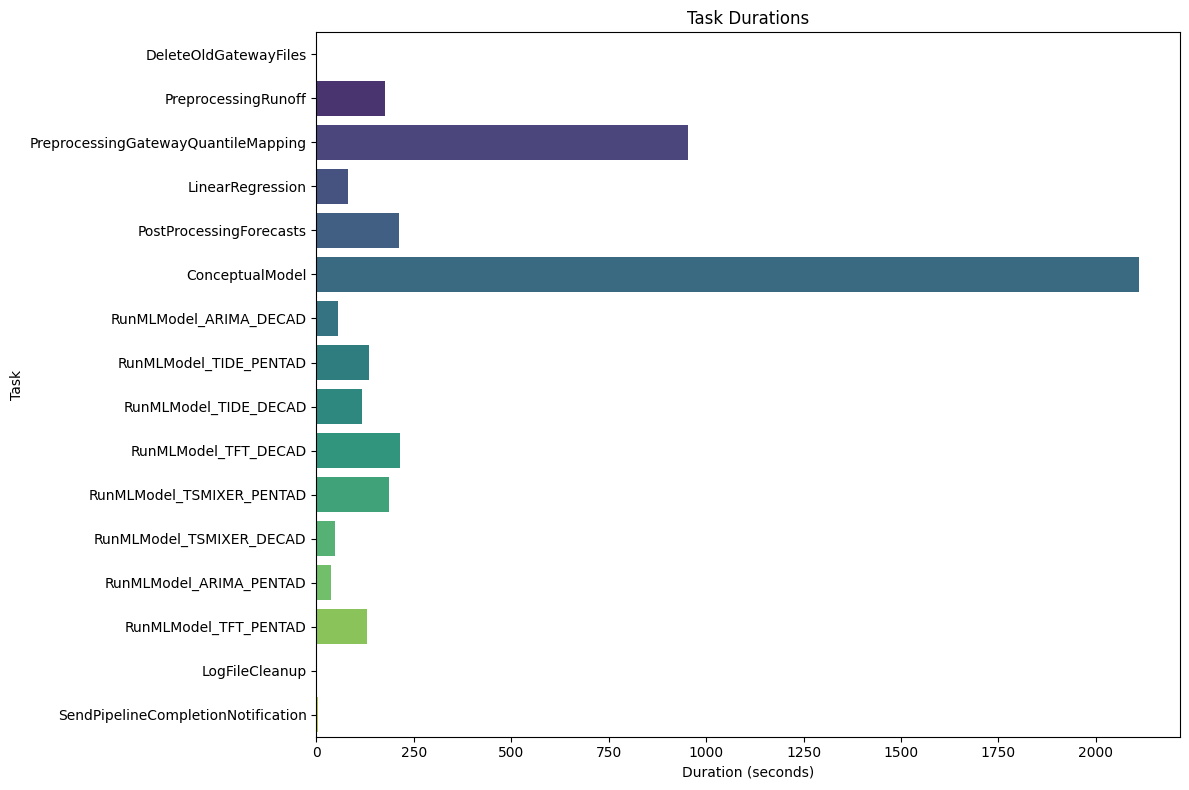

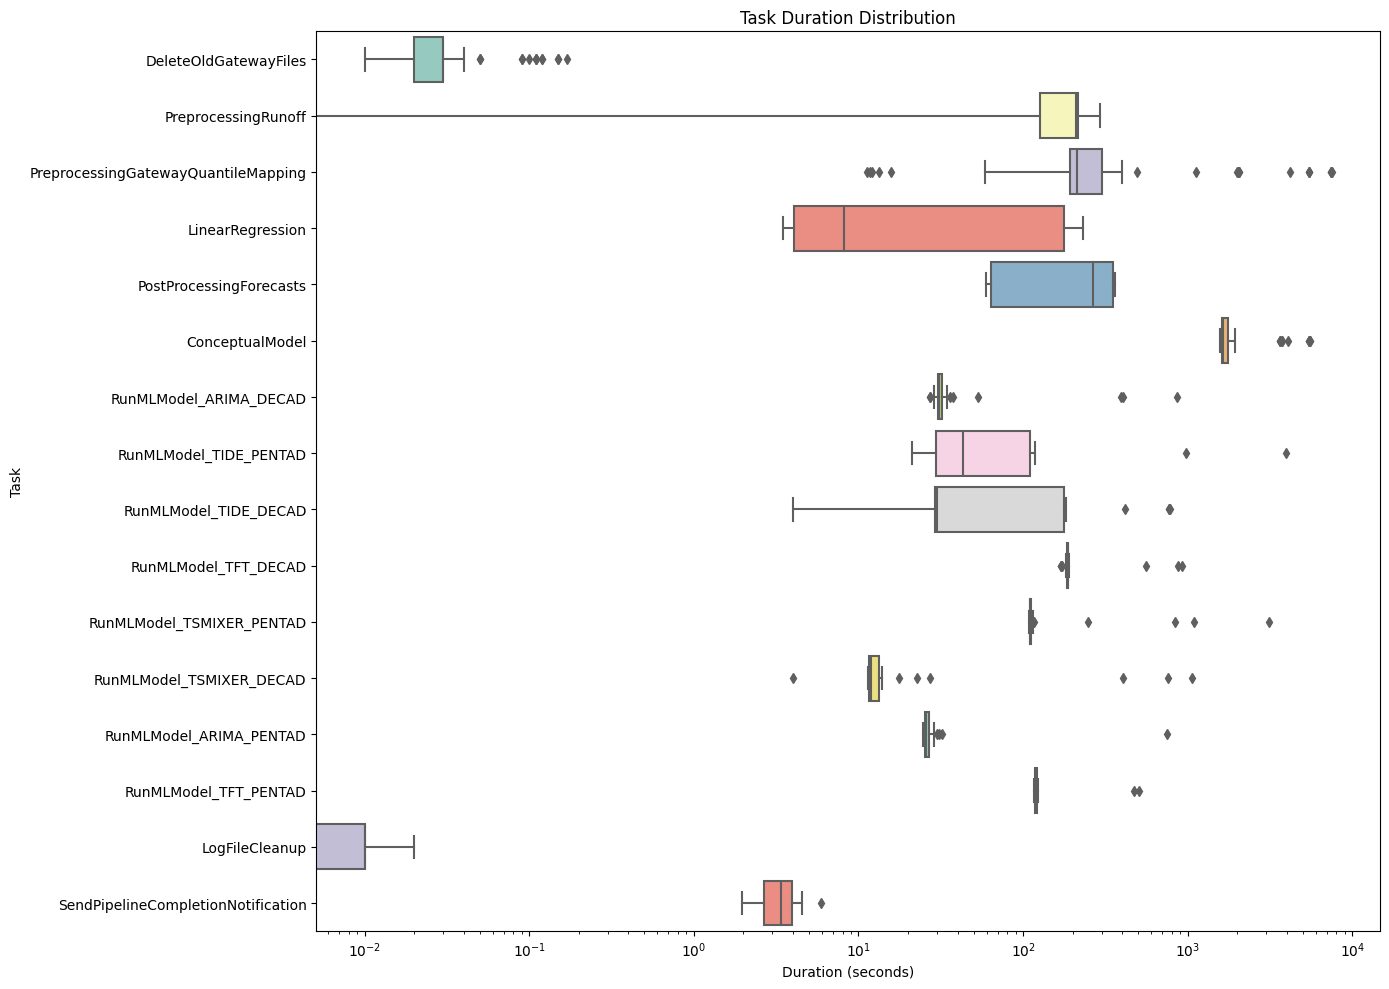

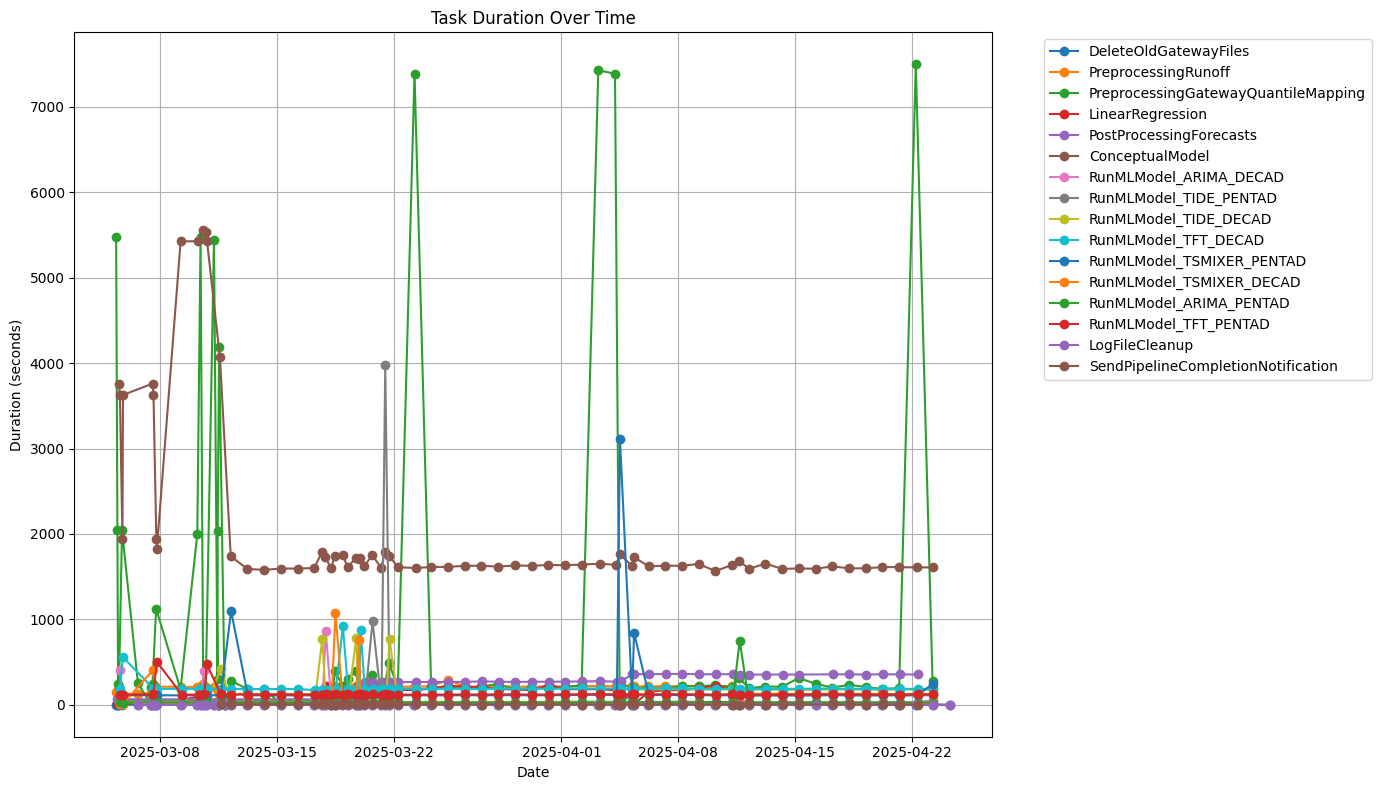


Total Pipeline Runs: 79
Pipeline Run 1: 2025-03-05 08:23:03.085681 to 2025-03-05 09:58:10.055088, Duration: 5706.97 seconds (95.12 minutes)
Pipeline Run 2: 2025-03-05 10:13:50.983290 to 2025-03-05 10:50:13.557317, Duration: 2182.57 seconds (36.38 minutes)
Pipeline Run 3: 2025-03-05 11:13:24.841536 to 2025-03-05 11:19:32.158744, Duration: 367.32 seconds (6.12 minutes)
Pipeline Run 4: 2025-03-05 12:28:32.742874 to 2025-03-05 14:53:55.716400, Duration: 8722.97 seconds (145.38 minutes)
Pipeline Run 5: 2025-03-05 16:52:30.644377 to 2025-03-05 19:18:00.780442, Duration: 8730.14 seconds (145.50 minutes)
Pipeline Run 6: 2025-03-06 15:46:09.394046 to 2025-03-06 15:52:27.024996, Duration: 377.63 seconds (6.29 minutes)
Pipeline Run 7: 2025-03-07 10:06:58.244712 to 2025-03-07 10:09:26.753861, Duration: 148.51 seconds (2.48 minutes)
Pipeline Run 8: 2025-03-07 10:44:07.077812 to 2025-03-07 12:40:16.974940, Duration: 6969.90 seconds (116.16 minutes)
Pipeline Run 9: 2025-03-07 12:40:16.986762 to 2025

In [1]:
import pandas as pd
import re
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Function to parse the log file
def parse_timing_log(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Split by separator line
    entries = content.split('--------------------------------------------------')

    # Parse each entry
    data = []
    for entry in entries:
        if not entry.strip():
            continue

        task_match = re.search(r'Task: (.*?)$', entry, re.MULTILINE)
        start_match = re.search(r'Start Time: (.*?)$', entry, re.MULTILINE)
        end_match = re.search(r'End Time: (.*?)$', entry, re.MULTILINE)
        duration_match = re.search(r'Duration: (.*?) seconds', entry, re.MULTILINE)
        status_match = re.search(r'Status: (.*?)$', entry, re.MULTILINE)
        details_match = re.search(r'Details: (.*?)$', entry, re.MULTILINE)

        if all([task_match, start_match, end_match, duration_match, status_match]):
            task = task_match.group(1).strip()
            start_time = start_match.group(1).strip()
            end_time = end_match.group(1).strip()
            duration = float(duration_match.group(1).strip())
            status = status_match.group(1).strip()
            details = details_match.group(1).strip() if details_match else ''

            data.append({
                'Task': task,
                'Start Time': datetime.fromisoformat(start_time),
                'End Time': datetime.fromisoformat(end_time),
                'Duration': duration,
                'Status': status,
                'Details': details
            })

    return pd.DataFrame(data)

# Print directory of the current file
print(sys.path[0])

# Define path to file task_timings.log
file_path = sys.path[0] + '/../../../../sensitive_data_forecast_tools/intermediate_data/task_timings_KG_20250424.log'

# Get absolute path
file_path = os.path.abspath(file_path)

# Print path for reference
print(file_path)

df = parse_timing_log(file_path)

# Display the data
print("Task Timing Summary:")
print(df[['Task', 'Duration', 'Status']].head())

# Generate statistics by task
task_stats = df.groupby('Task').agg({
    'Duration': ['min', 'max', 'mean', 'median', 'std', 'count']
}).reset_index()

task_stats.columns = ['Task', 'Min (s)', 'Max (s)', 'Mean (s)', 'Median (s)', 'Std (s)', 'Count']
print("\nTask Statistics:")
print(task_stats.sort_values('Mean (s)', ascending=False))

# Plot the mean duration by task
plt.figure(figsize=(12, 8))
sns.barplot(x='Duration', y='Task', data=df, ci=None, palette='viridis')
plt.title('Task Durations')
plt.xlabel('Duration (seconds)')
plt.tight_layout()

# Plot boxplot to see distribution
plt.figure(figsize=(14, 10))
sns.boxplot(x='Duration', y='Task', data=df, palette='Set3')
plt.title('Task Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.xscale('log')  # Use log scale for better visualization
plt.tight_layout()

# Time series plot to see trends over time
plt.figure(figsize=(14, 8))
for task in df['Task'].unique():
    task_df = df[df['Task'] == task]
    plt.plot(task_df['Start Time'], task_df['Duration'], 'o-', label=task)

plt.title('Task Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

# Calculate total pipeline duration
pipeline_runs = []
current_run = []
for i, row in df.sort_values('Start Time').iterrows():
    if row['Task'] == 'DeleteOldGatewayFiles' and current_run:
        # Start of a new pipeline run
        pipeline_runs.append(current_run)
        current_run = [row]
    else:
        current_run.append(row)

if current_run:
    pipeline_runs.append(current_run)

print(f"\nTotal Pipeline Runs: {len(pipeline_runs)}")
for i, run in enumerate(pipeline_runs):
    run_df = pd.DataFrame(run)
    start = run_df['Start Time'].min()
    end = run_df['End Time'].max()
    duration = (end - start).total_seconds()
    print(f"Pipeline Run {i+1}: {start} to {end}, Duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")

